In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/spam-emails'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data=pd.read_csv("/kaggle/input/spam-emails/spam.csv")

In [3]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
import nltk

In [6]:
data["character"]=data["Message"].apply(len)
data["word"]=data.apply(lambda row: nltk.word_tokenize(row["Message"]),axis=1).apply(len)
data["sentence"]=data.apply(lambda row: nltk.sent_tokenize(row["Message"]),axis=1).apply(len)
data.head()

,Category,Message,character,word,sentence
0,ham,"Go until jurong point, crazy.. Available only ...",111,23,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Figure size 1200x800 with 0 Axes>

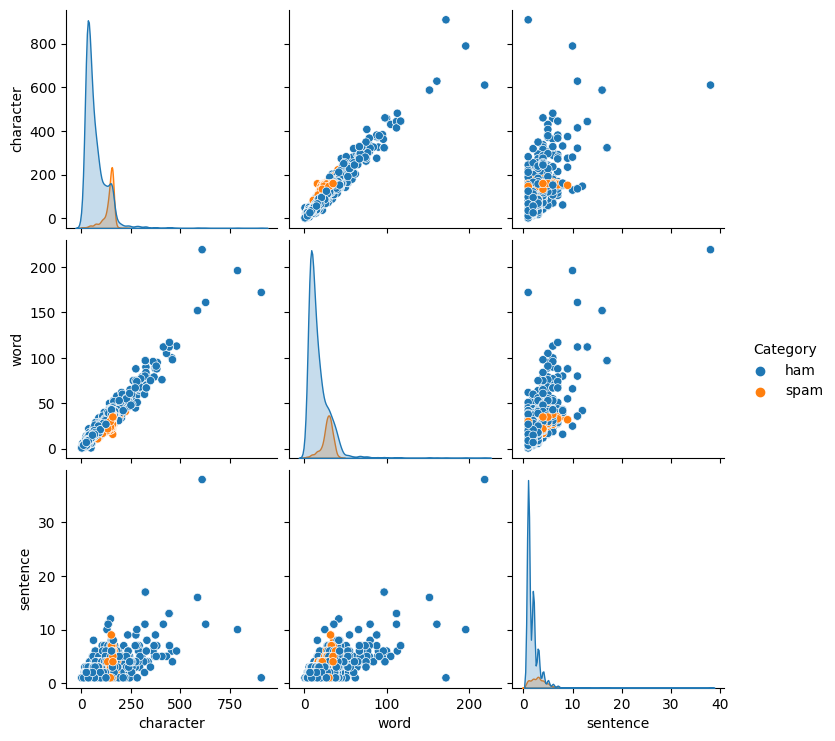

In [9]:
import  matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(12,8))
fg = sns.pairplot(data=data, hue="Category")
plt.show(fg)

In [11]:
data.shape

(5531, 5)

In [10]:
data=data[(data["word"]<75)]
data.shape

(5531, 5)

In [12]:
import re
def clean(text):
    clrtxt=text.lower()
    clrtxt2=" "
    for i in clrtxt:
        if i==" ":
            clrtxt2+=" "
        elif ord(i)<ord("a") or ord(i)>ord("z"):
            clrtxt2+=" "
        else:
            clrtxt2+=i
    return clrtxt2
data["clear_text"]=data["Message"].apply(clean)
data.head()

/tmp/ipykernel_34/3278528817.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["clear_text"]=data["Message"].apply(clean)


,Category,Message,character,word,sentence,clear_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,23,2,go until jurong point crazy available only...
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry in a wkly comp to win fa cup fin...
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say so early hor u c already then sa...
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i don t think he goes to usf he lives ar...


In [14]:
data["tokenize_text"]=data.apply(lambda row:nltk.word_tokenize(row["clear_text"]),axis=1)
data.head()

/tmp/ipykernel_34/3195704863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tokenize_text"]=data.apply(lambda row:nltk.word_tokenize(row["clear_text"]),axis=1)


,Category,Message,character,word,sentence,clear_text,tokenize_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,23,2,go until jurong point crazy available only...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry in a wkly comp to win fa cup fin...,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say so early hor u c already then sa...,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i don t think he goes to usf he lives ar...,"[nah, i, don, t, think, he, goes, to, usf, he,..."


In [15]:
from nltk.corpus import stopwords
def remove_stopwords(text):
    stop_words=set(stopwords.words("english"))
    filtered=[i for i in text if i not in stop_words]
    return filtered
data["without_stopwords"]=data["tokenize_text"].apply(remove_stopwords)
data.head()

/tmp/ipykernel_34/2375767991.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["without_stopwords"]=data["tokenize_text"].apply(remove_stopwords)


,Category,Message,character,word,sentence,clear_text,tokenize_text,without_stopwords
0,ham,"Go until jurong point, crazy.. Available only ...",111,23,2,go until jurong point crazy available only...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry in a wkly comp to win fa cup fin...,"[free, entry, in, a, wkly, comp, to, win, fa, ...","[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say so early hor u c already then sa...,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i don t think he goes to usf he lives ar...,"[nah, i, don, t, think, he, goes, to, usf, he,...","[nah, think, goes, usf, lives, around, though]"


In [ ]:
from nltk.stem import WordNetLemmatizer
def lemmatizer(text):
    lemma=[WordNetLemmatizer().lemmatize(word,pos="v") for word in text]
    return lemma
data["lemmatized_text"]=data["without_stopwords"].apply(lemmatizer)

In [6]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
clf=DecisionTreeClassifier()
clf.fit(xtrain,ytrain)
ypred=clf.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
precision = precision_score(ytest, ypred)
recall = recall_score(ytest, ypred)
f1 = f1_score(ytest,ypred)
print(accuracy,precision,recall,f1)


0.9694976076555024 0.9023255813953488 0.8660714285714286 0.8838268792710706


In [ ]:
from sklearn.feature_selection import RFE